In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("../data/Telco-Customer-Churn.csv")

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [29]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print('-'*40)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column: gender
['Female' 'Male']
----------------------------------------
Column: SeniorCitizen
[0 1]
----------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: OnlineSecurity
['No

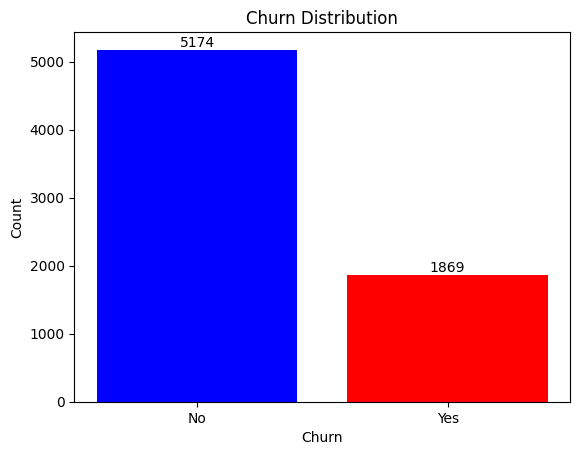

In [10]:
churn_counts = df['Churn'].value_counts()

# Create bar plot
fig, ax = plt.subplots()
ax.bar(churn_counts.index, churn_counts.values, color=['blue', 'red'])

# Add text labels on top of bars
for i, j in zip(churn_counts.index, churn_counts.values):
    ax.text(i, j, str(j), ha='center', va='bottom')

# Add titles and labels
ax.set_title("Churn Distribution")
ax.set_xlabel("Churn")
ax.set_ylabel("Count")

plt.show()

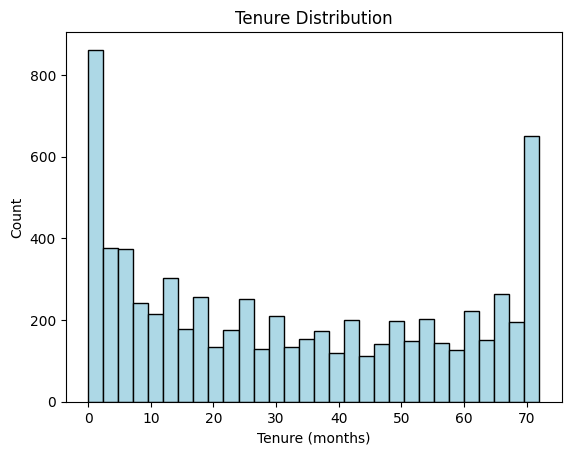

In [11]:
plt.hist(df['tenure'], bins=30, color='lightblue', edgecolor='black')
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()

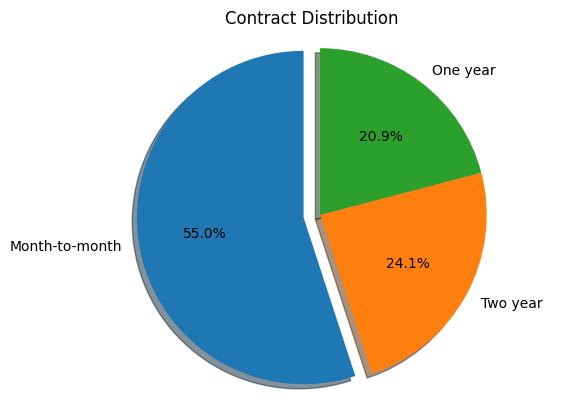

In [25]:
contract_counts = df['Contract'].value_counts()

# Colors for the slices
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Explode the largest slice
explode = [0.1 if i == contract_counts.values.max() else 0 for i in contract_counts.values]

# Create pie chart
plt.pie(
    contract_counts.values,
    labels=contract_counts.index,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True
)

# Add title
plt.title("Contract Distribution")

# Ensure pie chart is circular
plt.axis('equal')

plt.show()

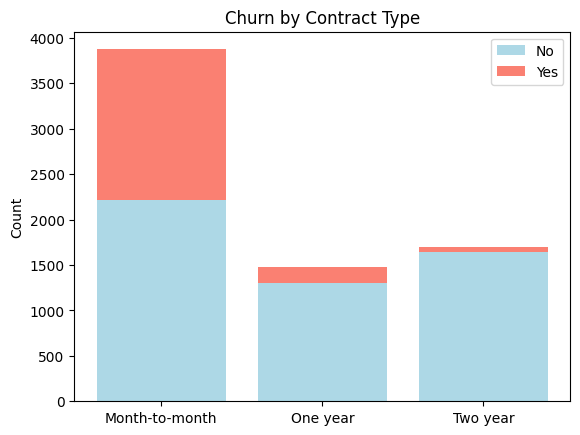

In [26]:
categories = df['Contract'].unique()
churn_yes = [len(df[(df['Contract']==c) & (df['Churn']=='Yes')]) for c in categories]
churn_no = [len(df[(df['Contract']==c) & (df['Churn']=='No')]) for c in categories]

plt.bar(categories, churn_no, label='No', color='lightblue')
plt.bar(categories, churn_yes, bottom=churn_no, label='Yes', color='salmon')
plt.title("Churn by Contract Type")
plt.ylabel("Count")
plt.legend()
plt.show()

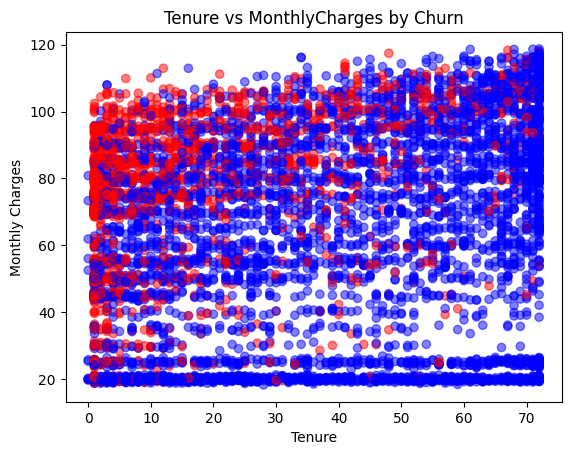

In [28]:
colors = df['Churn'].map({'No':'blue', 'Yes':'red'})
plt.scatter(df['tenure'], df['MonthlyCharges'], c=colors, alpha=0.5)
plt.title("Tenure vs MonthlyCharges by Churn")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

In [32]:
# Check for unexpected non-numeric values in numeric columns
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
for col in numeric_cols:
    invalid = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if not invalid.empty:
        print(f"Column {col} has invalid entries:\n", invalid)

Column TotalCharges has invalid entries:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service 